# Assignment 6 - Optimization Methods
## Matteo Ghilardini
---

### Part 3: programming problem

#### Setup the environment:

Install the required libraries in the jupiter notebook environment:

In [184]:
pip install numpy matplotlib

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


Import all the required libraries

In [185]:
import numpy as np
import matplotlib.pyplot as plt

#### **Problem 1** (Active constraints)

##### 1.

In [186]:
def is_c1_verified(x):
    x1, x2 = x
    return x1 + x2 >= 3

def is_c2_verified(x):
    x1, x2 = x
    return x1 + 2 * x2 <= 6

def is_c3_verified(x):
    x1, x2 = x
    return x1 >= 1

def is_c4_verified(x):
    x1, x2 = x
    return x2 >= 1

##### 2.

In [187]:
def is_feasible(x):
    return (is_c1_verified(x) and
            is_c2_verified(x) and
            is_c3_verified(x) and
            is_c4_verified(x))

##### 3.

In [188]:
x0 = np.array([1, 2])
x1 = np.array([3, 1.2])

print("Feasible region for x^0=",x0, is_feasible(x0))
print("Feasible region for x^1=",x1, is_feasible(x1))

Feasible region for x^0= [1 2] True
Feasible region for x^1= [3.  1.2] True


##### 4.

I use function `np.isclose()` to check equality that involves floating-point numbers since direct comparisons like x == y can fail.

In [189]:
def is_c1_active(x):
    x1, x2 = x
    return np.isclose(x1 + x2, 3)
def is_c2_active(x):
    x1, x2 = x
    return np.isclose(x1 + 2 * x2, 6)
def is_c3_active(x):
    x1, x2 = x
    return np.isclose(x1, 1)
def is_c4_active(x):
    x1, x2 = x
    return np.isclose(x2, 1)

##### 5.

In [190]:
print("For x^0=",x0)
print("\tc1=",is_c1_active(x0))
print("\tc2=",is_c2_active(x0))
print("\tc3=",is_c3_active(x0))
print("\tc4=",is_c4_active(x0))

print("For x^1=",x1)
print("\tc1=",is_c1_active(x1))
print("\tc2=",is_c2_active(x1))
print("\tc3=",is_c3_active(x1))
print("\tc4=",is_c4_active(x1))

For x^0= [1 2]
	c1= True
	c2= False
	c3= True
	c4= False
For x^1= [3.  1.2]
	c1= False
	c2= False
	c3= False
	c4= False


##### 6.

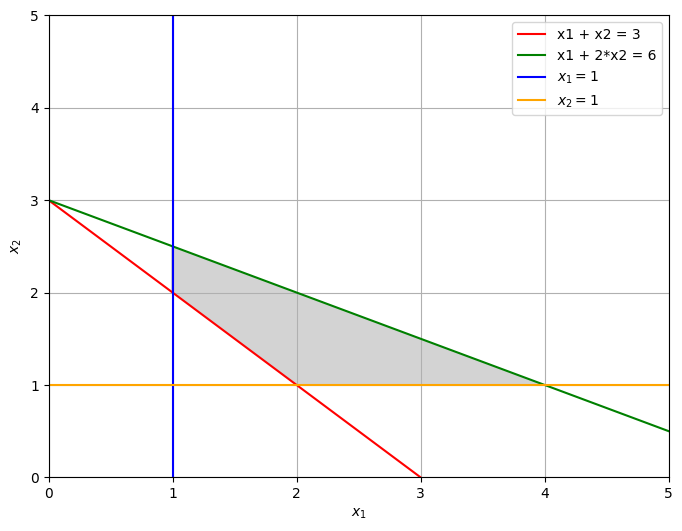

In [191]:
x1_vals = np.linspace(0, 5, 300)
x2_vals = np.linspace(0, 5, 300)
X1, X2 = np.meshgrid(x1_vals, x2_vals)

# Check feasibility at each grid point
feasible_mask = np.zeros_like(X1, dtype=bool)
for i in range(X1.shape[0]):
    for j in range(X1.shape[1]):
        point = (X1[i, j], X2[i, j])
        feasible_mask[i, j] = is_feasible(point)

# Plot the feasible region
plt.figure(figsize=(8, 6))
plt.contourf(X1, X2, feasible_mask, levels=[0, 0.5, 1], colors=["white", "lightgray"])

# Plot constraint boundaries
x = np.linspace(0, 5, 400)
plt.plot(x, 3 - x, 'r-', label='x1 + x2 = 3')
plt.plot(x, (6 - x) / 2, 'g-', label='x1 + 2*x2 = 6')
plt.axvline(1, color='b', linestyle='-', label=r'$x_1 = 1$')
plt.axhline(1, color='orange', linestyle='-', label=r'$x_2 = 1$')

# Labels and formatting
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.legend()
plt.grid()
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.show()

##### 7.

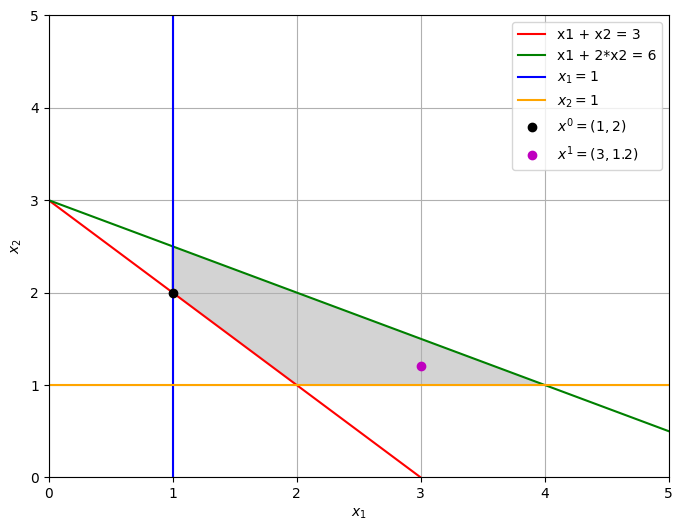

In [192]:
# Plot the feasible region
plt.figure(figsize=(8, 6))
plt.contourf(X1, X2, feasible_mask, levels=[0, 0.5, 1], colors=["white", "lightgray"])

# Plot constraint boundaries
x = np.linspace(0, 5, 400)
plt.plot(x, 3 - x, 'r-', label='x1 + x2 = 3')
plt.plot(x, (6 - x) / 2, 'g-', label='x1 + 2*x2 = 6')
plt.axvline(1, color='b', linestyle='-', label=r'$x_1 = 1$')
plt.axhline(1, color='orange', linestyle='-', label=r'$x_2 = 1$')

# Plot points x0 and x1
plt.plot(x0[0], x0[1], 'ko', label=r'$x^0 = (1, 2)$')
plt.plot(x1[0], x1[1], 'mo', label=r'$x^1 = (3, 1.2)$')

# Labels and formatting
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.legend()
plt.grid()
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.show()

##### 8.


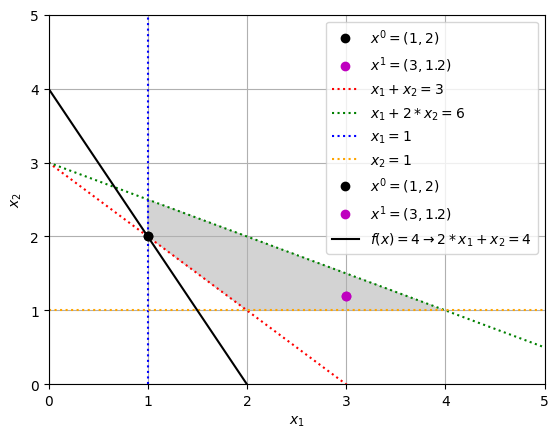

In [193]:
# Feasible region
plt.contourf(X1, X2, feasible_mask, levels=[0, 0.5, 1], colors=["white", "lightblue"])

# Add x^0 and x^1
x0 = (1, 2)
x1_ = (3, 1.2)
plt.plot(x0[0], x0[1], 'ko', label=r'$x^0 = (1, 2)$')
plt.plot(x1_[0], x1_[1], 'mo', label=r'$x^1 = (3, 1.2)$')

# Plot the feasible region
plt.contourf(X1, X2, feasible_mask, levels=[0, 0.5, 1], colors=["white", "lightgray"])

# Plot constraint boundaries
x = np.linspace(0, 5, 400)
plt.plot(x, 3 - x, 'r:', label=r'$x_1 + x_2 = 3$')
plt.plot(x, (6 - x) / 2, 'g:', label=r'$x_1 + 2*x_2 = 6$')
plt.axvline(1, color='b', linestyle=':', label=r'$x_1 = 1$')
plt.axhline(1, color='orange', linestyle=':', label=r'$x_2 = 1$')

# Plot points x0 and x1
plt.plot(x0[0], x0[1], 'ko', label=r'$x^0 = (1, 2)$')
plt.plot(x1[0], x1[1], 'mo', label=r'$x^1 = (3, 1.2)$')

# Plot the elvel line f(x) = 4
x1_line = np.linspace(0, 5, 300)
x2_line = 4 - 2 * x1_line
plt.plot(x1_line, x2_line, 'k-', label=r'$f(x) = 4 \rightarrow 2*x_1 + x_2 = 4$')

# Labels and formatting
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.legend()
plt.grid()
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.show()

The objective function is $f(x) = 2x_1 + x_2$, which defines a family of parallel lines $f(x) = b$.  
We plot the level line $f(x) = 4$, i.e., $x_2 = 4 - 2x_1$. This line intersects the feasible region $\Omega$, and specifically passes through the point $x^0 = (1, 2)$, which satisfies all constraints and lies on the boundary of $\Omega$.

Since the objective function is linear and $x^0$ achieves the lowest value of $f(x)$ over the feasible set, we conclude that $x^0$ is the **global minimiser**.


#### **Problem 2** (KKT conditions)

##### 1.

The problem written in the **general form** is:
$$
\begin{aligned}
&\min_{x \in \mathbb{R}^2} && x^2 \\
&\text{subject to} && x \ge 1 \\
& && x \le 4 \\
\end{aligned}
$$

So the constrains in KKT form are:
- $c_1(x) = x \ge 1 = 1-x \le 0$
- $c_2(x) = x \le 4 = x-4 \le 0$

In [194]:
def f(x):
    return x**2

def c1(x):
    return 1-x

def c2(x):
    return x-4

##### 2.

In [195]:
def is_feasible(x):
    return c1(x) <= 0 and c2(x) <= 0

##### 3.

In [196]:
x0 = np.array([0])
x1 = np.array([1])
x2 = np.array([3])

print("Feasible region for x^0=",x0, is_feasible(x0))
print("Feasible region for x^1=",x1, is_feasible(x1))
print("Feasible region for x^2=",x2, is_feasible(x2))

Feasible region for x^0= [0] [False]
Feasible region for x^1= [1] [ True]
Feasible region for x^2= [3] [ True]


##### 4.

The **Lagrangian formula** is defined as
$$
L (x, \lambda) = f(x) + \lambda_1 c_1(x) + ... +  \lambda_i c_i(x)
$$

And in our case become:
$$
L (x, \lambda) = f(x) + \lambda_1 c_1(x) +  \lambda_2 c_2(x)
$$

In [197]:
def lagrangian(x, l):
    return f(x) + l[0] * c1(x) + l[1] * c2(x)

##### 5.

In order to compute $\nabla L$ we rewrite the formula
$$
L (x, \lambda) = f(x) + \lambda_1 c_1(x) +  \lambda_2 c_2(x)
$$
explicitly as
$$
L (x, \lambda) = x^2 + \lambda_1 (1-x) +  \lambda_2 (x-4)
$$
and then compute
$$
\frac{\partial f}{\partial x} L (x, \lambda) = x^2 + \lambda_1 (1-x) +  \lambda_2 (x-4)
$$

that result as
$$
\nabla L (x, \lambda) = 2x - \lambda_1 + \lambda_2
$$

In [198]:
def grad_lagrangian(x, l):
    return 2 * x - l[0] + l[1]

##### 6.

Must check the following conditions:
- **Stationarity**: $\nabla L(x^*,\lambda) = 0$ (i.e. no descent direction exists)
- **Primal feasibility**: $\forall i, \; c_i(x^*) \le 0$ (i.e. all constrains must be satisfied)
- **Dual feasibility**: $\forall i, \; \lambda_i \ge 0$ (i.e. all $\lambda$ must be positive)
- **Complementary slackness**: $\forall i, \; \lambda_i c_i(x^*) = 0$ (i.e. ensures that only the active constraints affect the optimization via the Lagrangian)

In [199]:
x_star = np.array([1])
l_star = np.array([0,2])

print("Stationarity is satisfied:", np.isclose(grad_lagrangian(x_star, l_star), 0))
print("Primal feasibility is satisfied:", is_feasible(x_star))
print("Dual feasibility is satisfied:", np.all(l_star >= 0))
print("Complementary slackness is satisfied:", np.isclose(l_star[0] * c1(x_star), 0) and np.isclose(l_star[1] * c2(x_star), 0))

Stationarity is satisfied: [False]
Primal feasibility is satisfied: [ True]
Dual feasibility is satisfied: True
Complementary slackness is satisfied: [False]


We notice that the **KKT conditions are not verified at the given point** since _stationarity condition_ fails (the gradient of the Lagrangian is not zero), and _complementary slackness_ is violated since the second constraint is inactive at $x^* = 1$, yet its associated multiplier $\lambda_2 = 2$ is nonzero.  
This contradicts the requirement that inactive constraints must have zero multipliers.

#### **Problem 3** (Feasible directions)

##### 1.

From the feasible set 
$$
\Omega = \left\{ x \in \mathbb{R}^2 : -x_0 + x_1 \leq 2,\ x_0 + x_1 \leq 4,\ x_0 \geq 0,\ x_1 \geq 1 \right\}.
$$
We can extract each inequality and from it a line that delimitate the feasible area:
- $-x_0 + x_1 \leq 2$ is equivalent to the region below line $x_1= 2+x_0$
- $x_0 + x_1 \leq 4$ is equivalent to the region below line $x_1 =4-x_0$
- $x_0 \geq 0$ is equivalent to the region to the right of line $x_0 = 0$
- $x_1 \geq 1$ is equivalent to the region above line $x_1 = 1$

In [217]:
# Also if this is part of problem 3.2, i need it to show the feasible region
def c1(x):
    x0, x1 = x
    return -x0 + x1 - 2

def c2(x):
    x0, x1 = x
    return x0 + x1 - 4

def c3(x):
    x0, _ = x
    return -x0

def c4(x):
    _, x1 = x
    return 1 - x1

def is_feasible(x):
    return (c1(x) <= 0 and
            c2(x) <= 0 and
            c3(x) <= 0 and
            c4(x) <= 0)

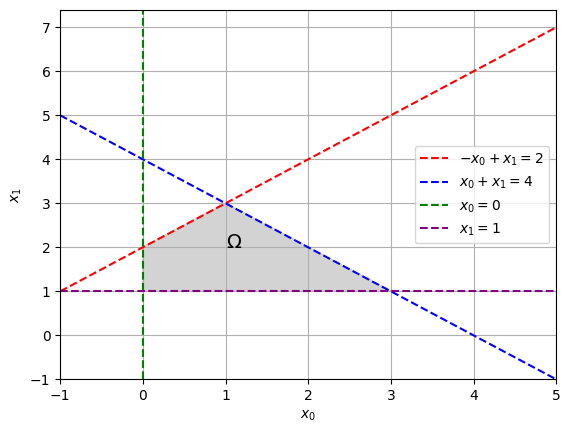

In [218]:
x0_vals = np.linspace(-1, 5, 400)
x1_vals = np.linspace(-1, 5, 400)
X0, X1 = np.meshgrid(x0_vals, x1_vals)

# Annotate the feasible region at a representative point
plt.text(1, 2, r'$\Omega$', fontsize=14, color='black')

# Check feasibility at each grid point
feasible_mask = np.zeros_like(X0, dtype=bool)
for i in range(X0.shape[0]):
    for j in range(X0.shape[1]):
        point = (X0[i, j], X1[i, j])
        feasible_mask[i, j] = is_feasible(point)
        
# Plot the feasible region
plt.contourf(X0, X1, feasible_mask, levels=[0, 0.5, 1], colors=["white", "lightgray"])

# Constraint lines (for annotation only)
plt.plot(x0_vals, x0_vals + 2, 'r--', label=r'$-x_0 + x_1 = 2$')
plt.plot(x0_vals, -x0_vals + 4, 'b--', label=r'$x_0 + x_1 = 4$')
plt.axvline(0, color='g', linestyle='--', label=r'$x_0 = 0$')
plt.axhline(1, color='purple', linestyle='--', label=r'$x_1 = 1$')

plt.xlabel(r'$x_0$')
plt.ylabel(r'$x_1$')
plt.legend()
plt.grid()
plt.show()

##### 2.

In [219]:
def c1(x):
    x0, x1 = x
    return -x0 + x1 - 2

def c2(x):
    x0, x1 = x
    return x0 + x1 - 4

def c3(x):
    x0, _ = x
    return -x0

def c4(x):
    _, x1 = x
    return 1 - x1

def is_feasible(x):
    return (c1(x) <= 0 and
            c2(x) <= 0 and
            c3(x) <= 0 and
            c4(x) <= 0)


##### 3.

In [220]:
def active_set(x):
    constraints = np.isclose(np.array([c1(x), c2(x), c3(x), c4(x)]), 0)
    return np.where(constraints)[0]

##### 4.

In [221]:
x = np.array([0,0])
print('Point x=', x)
print('\tIs feasible:', is_feasible(x))
print('\tActive set:', active_set(x))

x = np.array([0,4])
print('Point x=', x)
print('\tIs feasible:', is_feasible(x))
print('\tActive set:', active_set(x))

x = np.array([1,3])
print('Point x=', x)
print('\tIs feasible:', is_feasible(x))
print('\tActive set:', active_set(x))

Point x= [0 0]
	Is feasible: False
	Active set: [2]
Point x= [0 4]
	Is feasible: False
	Active set: [1 2]
Point x= [1 3]
	Is feasible: True
	Active set: [0 1]


##### 5.

For each contrain $c_i$ we have to compute the gradient:
- $c_1(x) = -x_0+ x_1 - 2 \rightarrow \nabla c_1 = [-1, 1]$ 
- $c_2(x) = x_0 + x_1 - 4 \rightarrow \nabla c_2 = [1,1]$ 
- $c_3(x) = -x0 \rightarrow \nabla c_3 = [-1, 0]$ 
- $c_4(x) = 1 - x1 \rightarrow \nabla c_4 = [0,-1]$

In [222]:
gradient_c1 = np.array([-1, 1])
gradient_c2 = np.array([1, 1])
gradient_c3 = np.array([-1, 0])
gradient_c4 = np.array([0, -1])

gradients = np.array([gradient_c1, gradient_c2, gradient_c3, gradient_c4])

def is_feasible_direction(x, d):
    A = active_set(x)
    for a in A:
        if np.dot(gradients[a], d) < 0: # Since the constraints are of the form c(x) <= 0, must be non-negative
            return False
    return True

##### 6.

In [228]:
x = np.array([0, 0])
x_bar = np.array([1, 3])

d= np.array([0, -1])
print('Direction d=', d)
print('\tIs feasible direction for x ',x,':', is_feasible_direction(x, d))
print('\tIs feasible direction for x_bar ',x_bar,':', is_feasible_direction(x_bar, d))

d= np.array([1, 0])
print('Direction d=', d)
print('\tIs feasible direction for x ',x,':', is_feasible_direction(x, d))
print('\tIs feasible direction for x_bar ',x_bar,':', is_feasible_direction(x_bar, d))

d= np.array([0, 1])
print('Direction d=', d)
print('\tIs feasible direction for x ',x,':', is_feasible_direction(x, d))
print('\tIs feasible direction for x_bar ',x_bar,':', is_feasible_direction(x_bar, d))

Direction d= [ 0 -1]
	Is feasible direction for x  [0 0] : True
	Is feasible direction for x_bar  [1 3] : False
Direction d= [1 0]
	Is feasible direction for x  [0 0] : False
	Is feasible direction for x_bar  [1 3] : False
Direction d= [0 1]
	Is feasible direction for x  [0 0] : True
	Is feasible direction for x_bar  [1 3] : True
